<a href="https://colab.research.google.com/github/Seongjin1225/AI_SCHOOL_9/blob/main/%EB%8D%B0%EC%9D%B4%ED%84%B0%20%EB%B6%84%EC%84%9D/11%EC%9B%94%2010%EC%9D%BC/11%EC%9B%94_10%EC%9D%BC_%EB%B3%B5%EC%8A%B5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 회귀분석
- 기술 통계, 회귀 분석, t-검정 등
- usually 맨 마지막 컬럼 -> 종속 변수(Y)


In [ ]:
import pandas as pd

# 데이터 읽어오기
red = pd.read_csv('/content/drive/MyDrive/AI스쿨 파일/winequality-red2.csv')
white = pd.read_csv('/content/drive/MyDrive/AI스쿨 파일/winequality-white2.csv')

red = pd.DataFrame(red)
white = pd.DataFrame(white)

# 새로운 파일로 저장
red.to_csv('/content/drive/MyDrive/AI스쿨 파일/winequality-red2.csv', index=False)
white.to_csv('/content/drive/MyDrive/AI스쿨 파일/winequality-white2.csv', index=False)

# 데이터 정보 확인
red.head()
white.head()

# 'type' 컬럼 추가
red.insert(0, column='type', value='red')
red.head()

white.insert(0, column='type', value='white')
white.head()

# 두 csv 파일 합치기
wine = pd.concat([red,white])
wine.shape

# 새 csv로 저장
wine.to_csv('/content/drive/MyDrive/AI스쿨 파일/wine.csv',index=False)
wine.columns = wine.columns.str.replace(' ','_')
wine.head()
wine.describe

<bound method NDFrame.describe of        type  fixed_acidity  volatile_acidity  citric_acid  residual_sugar  \
0       red            7.4              0.70         0.00             1.9   
1       red            7.8              0.88         0.00             2.6   
2       red            7.8              0.76         0.04             2.3   
3       red           11.2              0.28         0.56             1.9   
4       red            7.4              0.70         0.00             1.9   
...     ...            ...               ...          ...             ...   
4893  white            6.2              0.21         0.29             1.6   
4894  white            6.6              0.32         0.36             8.0   
4895  white            6.5              0.24         0.19             1.2   
4896  white            5.5              0.29         0.30             1.1   
4897  white            6.0              0.21         0.38             0.8   

      chlorides  free_sulfur_dioxide  tot

In [ ]:
sorted(wine.quality.unique())
wine.quality.value_counts()

6    2836
5    2138
7    1079
4     216
8     193
3      30
9       5
Name: quality, dtype: int64

In [ ]:
from scipy import stats
from statsmodels.formula.api import ols, glm

red_wine_quality = wine.loc[wine['type']=='red', 'quality']
white_wine_quality = wine.loc[wine['type']=='white', 'quality']
# r = wine[wine.type=='red']['quality'] --> 같은 결과 나옴 ㅇㅇ

# t-검정(그룹 간의 차이 확인)
stats.ttest_ind(red_wine_quality, white_wine_quality, equal_var=False)

TtestResult(statistic=-10.149363059143164, pvalue=8.168348870049682e-24, df=2950.750452166697)

In [ ]:
Rformula = 'quality ~ fixed_acidity + volatile_acidity + citric_acid + \
            residual_sugar + chlorides + free_sulfur_dioxide + \
            total_sulfur_dioxide + density + pH + sulphates + alcohol'
# Rformula는 종속변수(Y) + 독립변수의 형태로 구성되어 있음 ( 이 형태 고정임ㅇ)
# ols라는 회귀분석 모듈 사용하기 위해서는 이 형식 지켜야 함

regression_result = ols(Rformula, data=wine).fit()
regression_result.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                quality   R-squared:                       0.292
Model:                            OLS   Adj. R-squared:                  0.291
Method:                 Least Squares   F-statistic:                     243.3
Date:                Sat, 11 Nov 2023   Prob (F-statistic):               0.00
Time:                        10:07:26   Log-Likelihood:                -7215.5
No. Observations:                6497   AIC:                         1.445e+04
Df Residuals:                    6485   BIC:                         1.454e+04
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept               55.7627     11.894      4.688      0.000      32.447      79.079
fixed_acidity            0.0677      0.016      4.346      0.000       0.037       0.098
volatile_acidity        -1.3279      0.077    -17.162      0.000      -1.480      -1.176
citric_acid             -0.1097      0.080     -1.377      0.168      -0.266       0.046
residual_sugar           0.0436      0.005      8.449      0.000       0.033       0.054
chlorides               -0.4837      0.333     -1.454      0.146      -1.136       0.168
free_sulfur_dioxide      0.0060      0.001      7.948      0.000       0.004       0.007
total_sulfur_dioxide    -0.0025      0.000     -8.969      0.000      -0.003      -0.002
density                -54.9669     12.137     -4.529      0.000     -78.760     -31.173
pH                       0.4393      0.090      4.861      0.000       0.262       0.616
sulphates                0.7683      0.076     10.092      0.000       0.619       0.917
alcohol                  0.2670      0.017     15.963      0.000       0.234       0.300
==============================================================================
Omnibus:                      144.075   Durbin-Watson:                   1.646
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              324.712
Skew:                          -0.006   Prob(JB):                     3.09e-71
Kurtosis:                       4.095   Cond. No.                     2.49e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.49e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [ ]:
# 테스트 위해 두개의 컬럼 제외 하고 실행
sample1 = wine[wine.columns.difference(['quality', 'type'])]  # 괄호 안의 컬럼 제외하고 실행 의미
sample1 = sample1[0:5][:]

sample1_predict = regression_result.predict(sample1)
sample1_predict

0    4.997607
1    4.924993
2    5.034663
3    5.680333
4    4.997607
dtype: float64

# 공공 보건 의료

In [6]:
import numpy as np
import pandas as pd
pd.set_option('mode.chained_assignment',  None) # Warning 방지용

data = pd.read_csv('/content/drive/MyDrive/AI스쿨 파일/데이터 분석/공공보건의료기관현황.csv',encoding='cp949',index_col=0)
data.head()

,병원 명,설립형태,근거 법령,관계 행정기관,관계 공공단체,심평원 요양기관번호,종별구분,병상수,소재지 우편번호,주소,홈페이지,대표전화,FAX,비고
연번,,,,,,,,,,,,,,
1,강원도 재활병원,시도립,강원도재활병원설치및운영에관한조례,강원도,해당없음,32200641,병원,165,24227,강원도 춘천시 충열로 142번길 24-16,www.grh.or.kr,033-248-7700,033-248-7723,NaN
2,강원도 삼척의료원,특수법인,지방의료원의 설립 및 운영에 관한 법률,보건복지부(강원도),지방의료원,32100060,종합병원,152,25920,강원도 삼척시 오십천로 418,http://ksmc.or.kr,033-572-1141,033-573-8424,NaN
3,강원도 영월의료원,특수법인,지방의료원의 설립 및 운영에 관한 법률,보건복지부(강원도),지방의료원,32100078,종합병원,214,26234,강원도 영월군 영월읍 중앙1로 59,http://www.youngwol.org,033-370-9117,033-370-9137,NaN
4,강원도 원주의료원,특수법인,지방의료원의 설립 및 운영에 관한 법률,보건복지부(강원도),지방의료원,32100086,종합병원,237,26448,강원도 원주시 서원대로 387(개운동),www.kwmc.or.kr,033-760-4500,033-761-5121,NaN
5,강원도 강릉의료원,특수법인,지방의료원의 설립 및 운영에 관한 법률,보건복지부(강원도),지방의료원,32100159,종합병원,137,25535,강원도 강릉시 경강로 2007(남문동 164-1),http://www.gnmc.or.kr,033-646-6910,033-610-1415,NaN


In [7]:
# 주소에서 시도, 군구 주소 분리
addr = pd.DataFrame(data['주소'].apply(lambda x:x.split()[:2]).to_list(),columns=('시도','군구'))
addr.head()

,시도,군구
0,강원도,춘천시
1,강원도,삼척시
2,강원도,영월군
3,강원도,원주시
4,강원도,강릉시


In [8]:
addr['시도'].unique()

array(['강원도', '경기도', '경기', '경남', '창원시', '경상남도', '경상북도', '경산시', '경북',
       '인천광역시', '대구광역시', '전라남도', '대전광역시', '광주광역시', '제주특별자치도', '부산광역시',
       '전라북도', '충북', '서울특별시', '서울시', '부산특별시', '대전시', '충남', '전남', '충청남도',
       '울산광역시', '전북', '천안시', '충청북도'], dtype=object)

In [9]:
# 이상있는 값 처리
addr[addr['시도']=='창원시']
addr.iloc[27] = ['경상남도', '창원시']
addr.iloc[31] = ['경상남도', '창원시']

addr.iloc[27]
addr.iloc[31]

addr[addr['시도']=='경산시']
addr.iloc[47] = ['경상북도', '경산시']
addr.iloc[47]

addr[addr['시도']=='천안시']
addr.iloc[209] = ['충청남도', '천안시']
addr.iloc[210] = ['충청남도', '천안시']

addr.iloc[209]
addr.iloc[210]

시도    충청남도
군구     천안시
Name: 210, dtype: object

In [10]:
addr['시도'].unique()

array(['강원도', '경기도', '경기', '경남', '경상남도', '경상북도', '경북', '인천광역시', '대구광역시',
       '전라남도', '대전광역시', '광주광역시', '제주특별자치도', '부산광역시', '전라북도', '충북',
       '서울특별시', '서울시', '부산특별시', '대전시', '충남', '전남', '충청남도', '울산광역시', '전북',
       '충청북도'], dtype=object)

In [11]:
# 표준 행정구역으로 수정
addr_aliases = {'경기':'경기도', '경남':'경상남도', '경북':'경상북도', '충북':'충청북도', '충남':'충청남도',
                '전남':'전라남도', '전북':'전라북도', '서울시':'서울특별시', '부산특별시':'부산광역시',
                '대전시':'대전광역시'}
addr['시도'] = addr['시도'].apply(lambda x:addr_aliases.get(x,x))
addr['시도'].unique()

array(['강원도', '경기도', '경상남도', '경상북도', '인천광역시', '대구광역시', '전라남도', '대전광역시',
       '광주광역시', '제주특별자치도', '부산광역시', '전라북도', '충청북도', '서울특별시', '충청남도',
       '울산광역시'], dtype=object)

In [12]:
# 군구 이상값 확인 및 처리
addr['군구'].unique()

array(['춘천시', '삼척시', '영월군', '원주시', '강릉시', '속초시', '정선군', '수원시', '이천시',
       '안성시', '의정부시', '포천시', '파주시', '용인시', '평택시', '시흥시', '여주시', '남양주시',
       '동두천시', '안산시', '부천시', '통영시', '사천시', '창원시', '김해시', '양산시', '거창군',
       '남해군', '의령군', '포항시', '김천시', '안동시', '울진군', '경주시', '구미시', '영주시',
       '상주시', '문경시', '경산시', '의성군', '청도군', '고령군', '칠곡군', '봉화군', '울릉군',
       '부평구', '북구', '순천시', '대덕구', '태백시', '동해시', '화성시', '광산구', '남구', '중구',
       '아란13길', '서구', '전주시', '진주시', '청주시', '종로구', '성남시', '동구', '화순군',
       '강동구', '사상구', '달서구', '해운대구', '유성구', '가평군', '양주시', '고양시', '홍천군',
       '양구군', '청원군', '계룡시', '논산시', '함평군', '양평군', '수성구', '달성군', '연수구',
       '노원구', '기장군', '공주시', '강북구', '광진구', '나주시', '창녕군', '목포시', '고흥군',
       '연제구', '동매로', '서초구', '은평구', '중랑구', '강남구', '동작구', '동대문구', '양천구',
       '성동구', '송파구', '울주군', '계양구', '옹진군', '보성군', '광양시', '영광군', '무안군',
       '진도군', '강진군', '곡성군', '여수시', '신안군', '장성군', '완주군', '부안군', '정읍시',
       '남원시', '군산시', '고창군', '진안군', '제주시', '서귀포시', '천안시', '보령시', '서산시',
       '서천

In [13]:
addr[addr['군구']=='아란13길']
addr.iloc[75] = ['제주특별자치도','제주시']
addr.iloc[75]

시도    제주특별자치도
군구        제주시
Name: 75, dtype: object

In [14]:
addr['군구'].unique()

array(['춘천시', '삼척시', '영월군', '원주시', '강릉시', '속초시', '정선군', '수원시', '이천시',
       '안성시', '의정부시', '포천시', '파주시', '용인시', '평택시', '시흥시', '여주시', '남양주시',
       '동두천시', '안산시', '부천시', '통영시', '사천시', '창원시', '김해시', '양산시', '거창군',
       '남해군', '의령군', '포항시', '김천시', '안동시', '울진군', '경주시', '구미시', '영주시',
       '상주시', '문경시', '경산시', '의성군', '청도군', '고령군', '칠곡군', '봉화군', '울릉군',
       '부평구', '북구', '순천시', '대덕구', '태백시', '동해시', '화성시', '광산구', '남구', '중구',
       '제주시', '서구', '전주시', '진주시', '청주시', '종로구', '성남시', '동구', '화순군', '강동구',
       '사상구', '달서구', '해운대구', '유성구', '가평군', '양주시', '고양시', '홍천군', '양구군',
       '청원군', '계룡시', '논산시', '함평군', '양평군', '수성구', '달성군', '연수구', '노원구',
       '기장군', '공주시', '강북구', '광진구', '나주시', '창녕군', '목포시', '고흥군', '연제구',
       '동매로', '서초구', '은평구', '중랑구', '강남구', '동작구', '동대문구', '양천구', '성동구',
       '송파구', '울주군', '계양구', '옹진군', '보성군', '광양시', '영광군', '무안군', '진도군',
       '강진군', '곡성군', '여수시', '신안군', '장성군', '완주군', '부안군', '정읍시', '남원시',
       '군산시', '고창군', '진안군', '서귀포시', '천안시', '보령시', '서산시', '서천군', '홍성군',
     

In [15]:
addr['시도군구'] = addr.apply(lambda x:x['시도']+' '+x['군구'], axis=1)
addr.head()

,시도,군구,시도군구
0,강원도,춘천시,강원도 춘천시
1,강원도,삼척시,강원도 삼척시
2,강원도,영월군,강원도 영월군
3,강원도,원주시,강원도 원주시
4,강원도,강릉시,강원도 강릉시


In [16]:
# 의료기관 수 합계 저장할 컬럼 추가(count)
addr['count'] = 0
addr.head()

,시도,군구,시도군구,count
0,강원도,춘천시,강원도 춘천시,0
1,강원도,삼척시,강원도 삼척시,0
2,강원도,영월군,강원도 영월군,0
3,강원도,원주시,강원도 원주시,0
4,강원도,강릉시,강원도 강릉시,0


In [17]:
addr_group = pd.DataFrame(addr.groupby(['시도','군구','시도군구'], as_index=False).count())
addr_group.head()

,시도,군구,시도군구,count
0,강원도,강릉시,강원도 강릉시,4
1,강원도,동해시,강원도 동해시,1
2,강원도,삼척시,강원도 삼척시,1
3,강원도,속초시,강원도 속초시,1
4,강원도,양구군,강원도 양구군,1


In [18]:
addr_group = addr_group.set_index('시도군구')
addr_group.head()

,시도,군구,count
시도군구,,,
강원도 강릉시,강원도,강릉시,4
강원도 동해시,강원도,동해시,1
강원도 삼척시,강원도,삼척시,1
강원도 속초시,강원도,속초시,1
강원도 양구군,강원도,양구군,1


In [19]:
population = pd.read_excel('/content/drive/MyDrive/AI스쿨 파일/데이터 분석/행정구역_시군구_별__성별_인구수_2.xlsx')
population.head()

# 컬럼 이름 변경
population = population.rename(columns={'행정구역(시군구)별(1)':'시도', '행정구역(시군구)별(2)':'군구'})
population.head()

# 군구 컬럼에서 공백 제거
for element in range(0, len(population)):
    population['군구'][element] = population['군구'][element].strip()

# 시도와 군구 연결하여 시도군구 컬럼 추가
population['시도군구'] = population.apply(lambda x : x['시도']+' '+x['군구'],axis=1)

population.head()

,시도,군구,총인구수 (명),남자인구수 (명),여자인구수 (명),시도군구
0,전국,소계,51847509,25862863,25984646,전국 소계
1,서울특별시,소계,9733509,4745088,4988421,서울특별시 소계
2,서울특별시,종로구,151215,73688,77527,서울특별시 종로구
3,서울특별시,중구,126201,61946,64255,서울특별시 중구
4,서울특별시,용산구,229385,110701,118684,서울특별시 용산구


In [20]:
# 필요없는 전국 소계 제거
population = population[population['군구'] != '소계']
population.head()

# 시도군구로 인덱스 재설정
population = population.set_index('시도군구')
population.head()

,시도,군구,총인구수 (명),남자인구수 (명),여자인구수 (명)
시도군구,,,,,
서울특별시 종로구,서울특별시,종로구,151215,73688,77527
서울특별시 중구,서울특별시,중구,126201,61946,64255
서울특별시 용산구,서울특별시,용산구,229385,110701,118684
서울특별시 성동구,서울특별시,성동구,300410,147020,153390
서울특별시 광진구,서울특별시,광진구,351263,170164,181099


In [21]:
addr_population_merge = pd.merge(addr_group, population, how='inner', left_index=True, right_index=True)
addr_population_merge.head()

# how='inner -> 내부 조인 의미(두 데이터프레임의 공통된 인덱스를 기준으로 병합)
# True 설정하면 두 데이터프레임의 인덱스를 기준으로 병합(left_index=addr_group, right_index=population)

,시도_x,군구_x,count,시도_y,군구_y,총인구수 (명),남자인구수 (명),여자인구수 (명)
시도군구,,,,,,,,
강원도 강릉시,강원도,강릉시,4,강원도,강릉시,213328,105775,107553
강원도 동해시,강원도,동해시,1,강원도,동해시,90417,45782,44635
강원도 삼척시,강원도,삼척시,1,강원도,삼척시,66806,33811,32995
강원도 속초시,강원도,속초시,1,강원도,속초시,81840,40470,41370
강원도 양구군,강원도,양구군,1,강원도,양구군,22526,11937,10589


In [22]:
local_MC_Population = addr_population_merge[['시도_x', '군구_x', 'count', '총인구수 (명)']]
local_MC_Population.head()

# 컬럼 이름 변경
local_MC_Population = local_MC_Population.rename(columns={'시도_x':'시도','군구_x':'군구','총인구수 (명)':'인구수'})
local_MC_Population.head()

,시도,군구,count,인구수
시도군구,,,,
강원도 강릉시,강원도,강릉시,4,213328
강원도 동해시,강원도,동해시,1,90417
강원도 삼척시,강원도,삼척시,1,66806
강원도 속초시,강원도,속초시,1,81840
강원도 양구군,강원도,양구군,1,22526


In [23]:
MC_count = local_MC_Population['count']
local_MC_Population['MC_ratio'] = MC_count.div(local_MC_Population['인구수'], axis=0)*100000

local_MC_Population.head()

,시도,군구,count,인구수,MC_ratio
시도군구,,,,,
강원도 강릉시,강원도,강릉시,4,213328,1.875047
강원도 동해시,강원도,동해시,1,90417,1.105987
강원도 삼척시,강원도,삼척시,1,66806,1.496872
강원도 속초시,강원도,속초시,1,81840,1.221896
강원도 양구군,강원도,양구군,1,22526,4.439315


In [24]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
fonts-nanum is already the newest version (20200506-1).
0 upgraded, 0 newly installed, 0 to remove and 31 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 12 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/usr/share/fonts/truetype: skipping, looped directory detected
/usr/share/fonts/truetype/humor-sans: skipping, looped directory detected
/usr/share/fonts/truetype/liberation: skipping, looped directory detected
/usr/share/fonts/truetype/

In [25]:
from matplotlib import pyplot as plt
from matplotlib import rcParams, style
style.use('ggplot')

from matplotlib import font_manager, rc
# font_name = font_manager.FontProperties(fname="c:/Windows/Fonts/malgun.ttf").get_name()
rc('font', family='NanumBarunGothic')

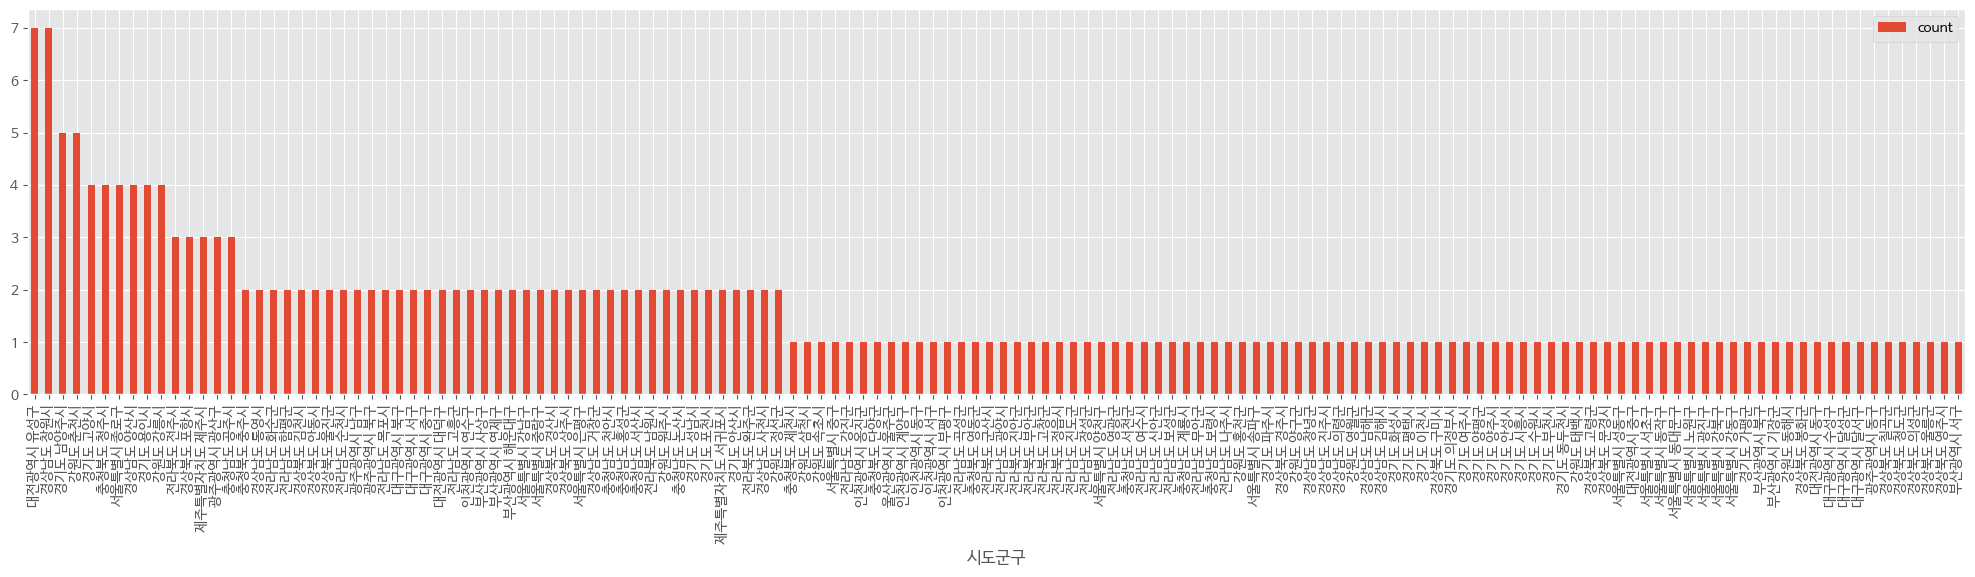

In [26]:
MC_ratio = local_MC_Population[['count']]
MC_ratio = MC_ratio.sort_values('count', ascending=False)
plt.rcParams['figure.figsize'] = (25,5)
MC_ratio.plot(kind='bar', rot=90)
plt.show()

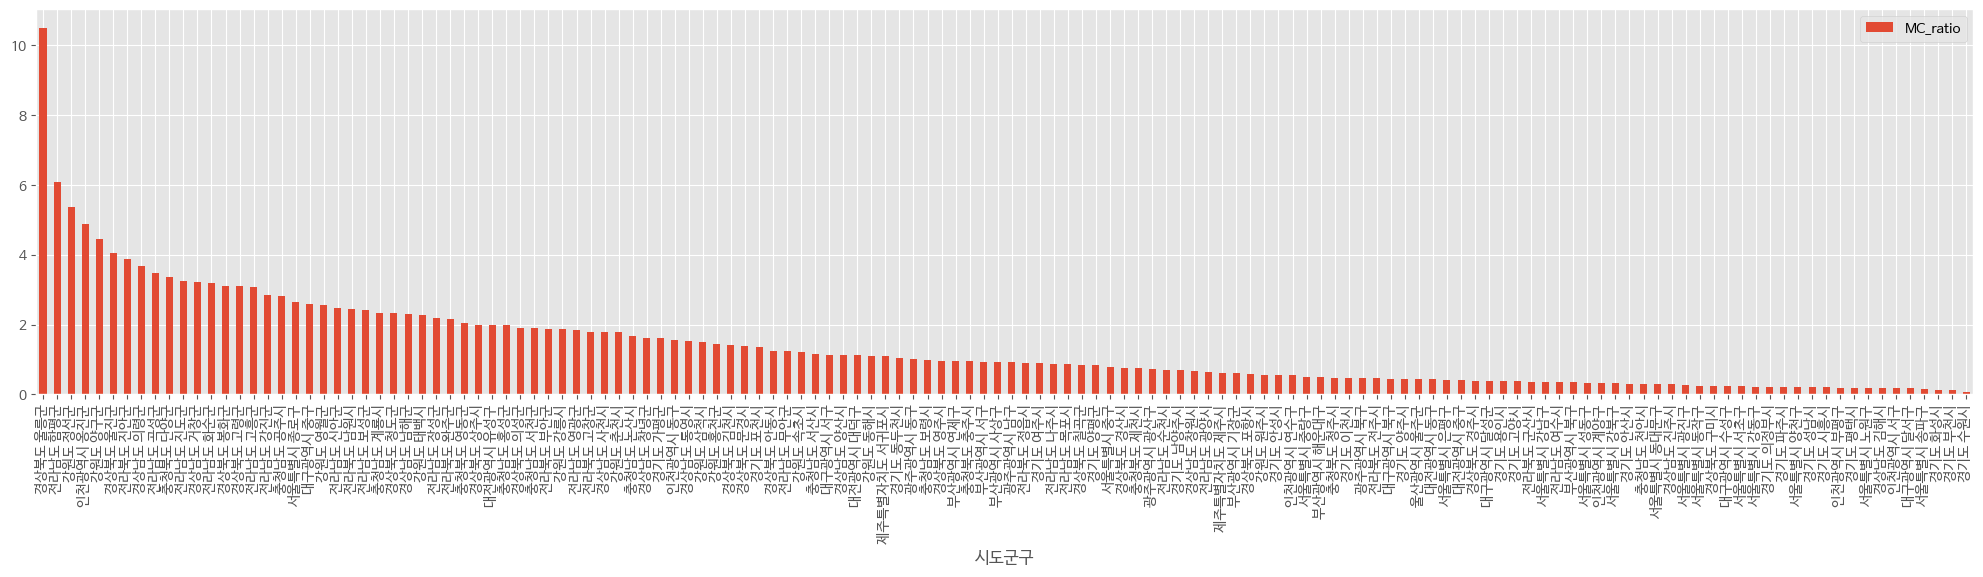

In [27]:
MC_ratio = local_MC_Population[['MC_ratio']]
MC_ratio = MC_ratio.sort_values('MC_ratio', ascending = False)
plt.rcParams["figure.figsize"] = (25,5)
MC_ratio.plot(kind='bar', rot=90)
plt.show()

In [28]:
import os
path = os.getcwd()

data_draw_korea = pd.read_csv('/content/drive/MyDrive/AI스쿨 파일/데이터 분석/data_draw_korea.csv',index_col = 0, encoding='UTF-8',engine='python')
data_draw_korea.head()

,인구수,shortName,x,y,면적,광역시도,행정구역
0,202520,강릉,11,4,1040.07,강원도,강릉시
1,25589,고성(강원),9,0,664.19,강원도,고성군
2,86747,동해,11,5,180.01,강원도,동해시
3,63986,삼척,11,8,1185.80,강원도,삼척시
4,76733,속초,9,1,105.25,강원도,속초시


In [29]:
# 시도군구 컬럼 만들기
data_draw_korea['시도군구'] = data_draw_korea.apply(lambda x: x['광역시도']+' '+x['행정구역'],axis=1)
data_draw_korea.head()

# 시도군구 컬럼을 인덱스로
data_draw_korea = data_draw_korea.set_index('시도군구')
data_draw_korea.head()

,인구수,shortName,x,y,면적,광역시도,행정구역
시도군구,,,,,,,
강원도 강릉시,202520,강릉,11,4,1040.07,강원도,강릉시
강원도 고성군,25589,고성(강원),9,0,664.19,강원도,고성군
강원도 동해시,86747,동해,11,5,180.01,강원도,동해시
강원도 삼척시,63986,삼척,11,8,1185.80,강원도,삼척시
강원도 속초시,76733,속초,9,1,105.25,강원도,속초시


In [30]:
# 데이터 합치기
data_draw_korea_MC_Population_all = pd.merge(data_draw_korea, local_MC_Population, how='outer', left_index=True, right_index=True)
data_draw_korea_MC_Population_all.head(30)

# how='outer --> 외부 조인(두 데이터프레임 중 하나에 있는 모든 행을 결과에 포함하며,
#다른 데이터프레임에 일치하는 행이 없는 경우에는 NaN(결측값)으로 )

,인구수_x,shortName,x,y,면적,광역시도,행정구역,시도,군구,count,인구수_y,MC_ratio
시도군구,,,,,,,,,,,,
강원도 강릉시,202520,강릉,11,4,1040.070,강원도,강릉시,강원도,강릉시,4.0,213328.0,1.875047
강원도 고성군,25589,고성(강원),9,0,664.190,강원도,고성군,NaN,NaN,NaN,NaN,NaN
강원도 동해시,86747,동해,11,5,180.010,강원도,동해시,강원도,동해시,1.0,90417.0,1.105987
강원도 삼척시,63986,삼척,11,8,1185.800,강원도,삼척시,강원도,삼척시,1.0,66806.0,1.496872
강원도 속초시,76733,속초,9,1,105.250,강원도,속초시,강원도,속초시,1.0,81840.0,1.221896
강원도 양구군,20809,양구,8,0,700.800,강원도,양구군,강원도,양구군,1.0,22526.0,4.439315
강원도 양양군,24551,양양,10,2,628.680,강원도,양양군,NaN,NaN,NaN,NaN,NaN
강원도 영월군,34966,영월,10,8,1127.360,강원도,영월군,강원도,영월군,1.0,39040.0,2.561475
강원도 원주시,313851,원주,10,7,867.300,강원도,원주시,강원도,원주시,2.0,350202.0,0.571099


In [31]:
BORDER_LINES = [
    [(3, 2), (5, 2), (5, 3), (9, 3), (9, 1)], # 인천
    [(2, 5), (3, 5), (3, 4), (8, 4), (8, 7), (7, 7), (7, 9), (4, 9), (4, 7), (1, 7)], # 서울
    [(1, 6), (1, 9), (3, 9), (3, 10), (8, 10), (8, 9),
     (9, 9), (9, 8), (10, 8), (10, 5), (9, 5), (9, 3)], # 경기도
    [(9, 12), (9, 10), (8, 10)], # 강원도
    [(10, 5), (11, 5), (11, 4), (12, 4), (12, 5), (13, 5),
     (13, 4), (14, 4), (14, 2)], # 충청남도
    [(11, 5), (12, 5), (12, 6), (15, 6), (15, 7), (13, 7),
     (13, 8), (11, 8), (11, 9), (10, 9), (10, 8)], # 충청북도
    [(14, 4), (15, 4), (15, 6)], # 대전시
    [(14, 7), (14, 9), (13, 9), (13, 11), (13, 13)], # 경상북도
    [(14, 8), (16, 8), (16, 10), (15, 10),
     (15, 11), (14, 11), (14, 12), (13, 12)], # 대구시
    [(15, 11), (16, 11), (16, 13)], # 울산시
    [(17, 1), (17, 3), (18, 3), (18, 6), (15, 6)], # 전라북도
    [(19, 2), (19, 4), (21, 4), (21, 3), (22, 3), (22, 2), (19, 2)], # 광주시
    [(18, 5), (20, 5), (20, 6)], # 전라남도
    [(16, 9), (18, 9), (18, 8), (19, 8), (19, 9), (20, 9), (20, 10)], # 부산시
]

In [32]:
def draw_blockMap(blockedMap, targetData, title, color ):
    whitelabelmin = (max(blockedMap[targetData]) - min(blockedMap[targetData])) * 0.25 + min(blockedMap[targetData])

    datalabel = targetData

    vmin = min(blockedMap[targetData])
    vmax = max(blockedMap[targetData])

    mapdata = blockedMap.pivot(index='y', columns='x', values=targetData)
    #print(mapdata)
    masked_mapdata = np.ma.masked_where(np.isnan(mapdata), mapdata)

    plt.figure(figsize=(8, 13))
    plt.title(title)
    plt.pcolor(masked_mapdata, vmin=vmin, vmax=vmax, cmap=color, edgecolor='#aaaaaa', linewidth=0.5)

    # 지역 이름 표시
    for idx, row in blockedMap.iterrows():
         annocolor = 'white' if row[targetData] > whitelabelmin else 'black'

         # 광역시는 구 이름이 겹치는 경우가 많아서 시단위 이름도 같이 표시한다. (중구, 서구)
         if row['광역시도'].endswith('시') and not row['광역시도'].startswith('세종'):
             dispname = '{}\n{}'.format(row['광역시도'][:2], row['행정구역'][:-1])
             if len(row['행정구역']) <= 2:
                 dispname += row['행정구역'][-1]
         else:
             dispname = row['행정구역'][:-1]

    #     # 서대문구, 서귀포시 같이 이름이 3자 이상인 경우에 작은 글자로 표시한다.
         if len(dispname.splitlines()[-1]) >= 3:
             fontsize, linespacing = 9.5, 1.5
         else:
             fontsize, linespacing = 11, 1.2

         plt.annotate(dispname, (row['x']+0.5, row['y']+0.5), weight='bold',
                      fontsize=fontsize, ha='center', va='center', color=annocolor,
                      linespacing=linespacing)

    # 시도 경계 그린다.
    for path in BORDER_LINES:
        ys, xs = zip(*path)
        plt.plot(xs, ys, c='black', lw=4)

    plt.gca().invert_yaxis()
    #plt.gca().set_aspect(1)
    plt.axis('off')

    cb = plt.colorbar(shrink=.1, aspect=10)
    cb.set_label(datalabel)

    plt.tight_layout()

    #plt.savefig(r'c:\Temp\' + 'blockMap_' + targetData + '.png')


    plt.show()

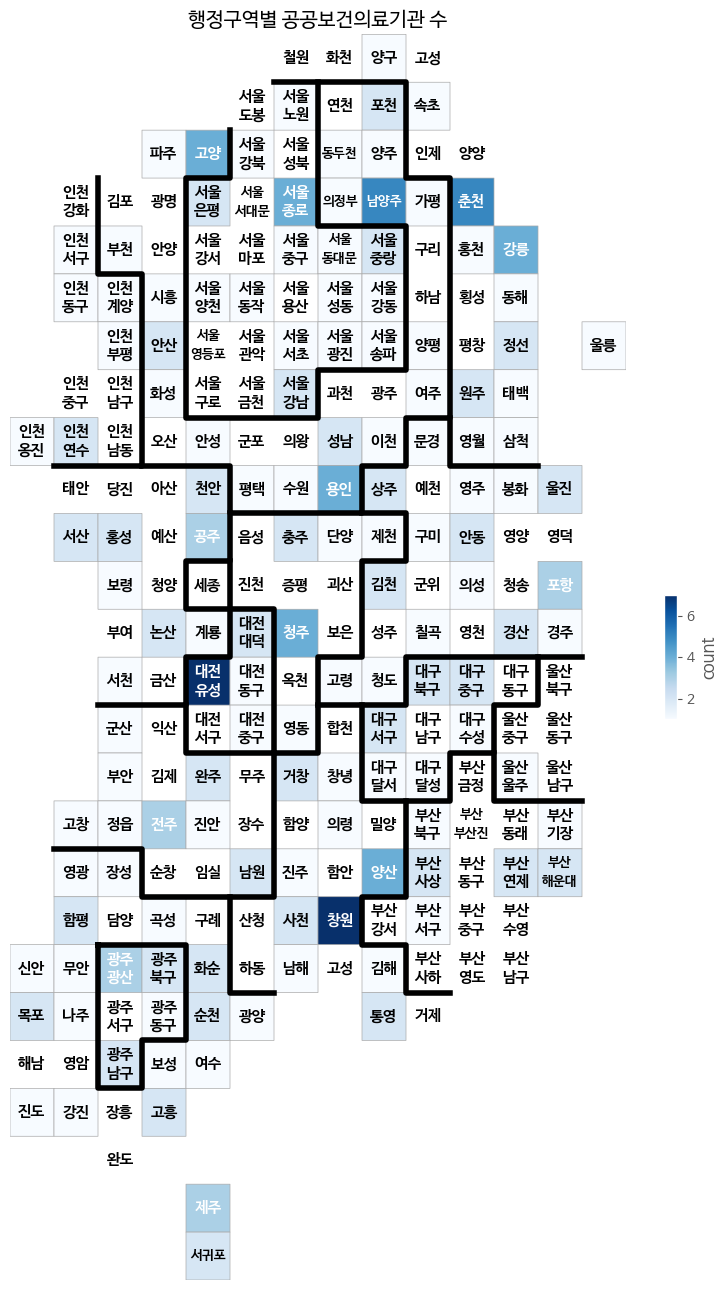

In [33]:
draw_blockMap(data_draw_korea_MC_Population_all, 'count', '행정구역별 공공보건의료기관 수', 'Blues')

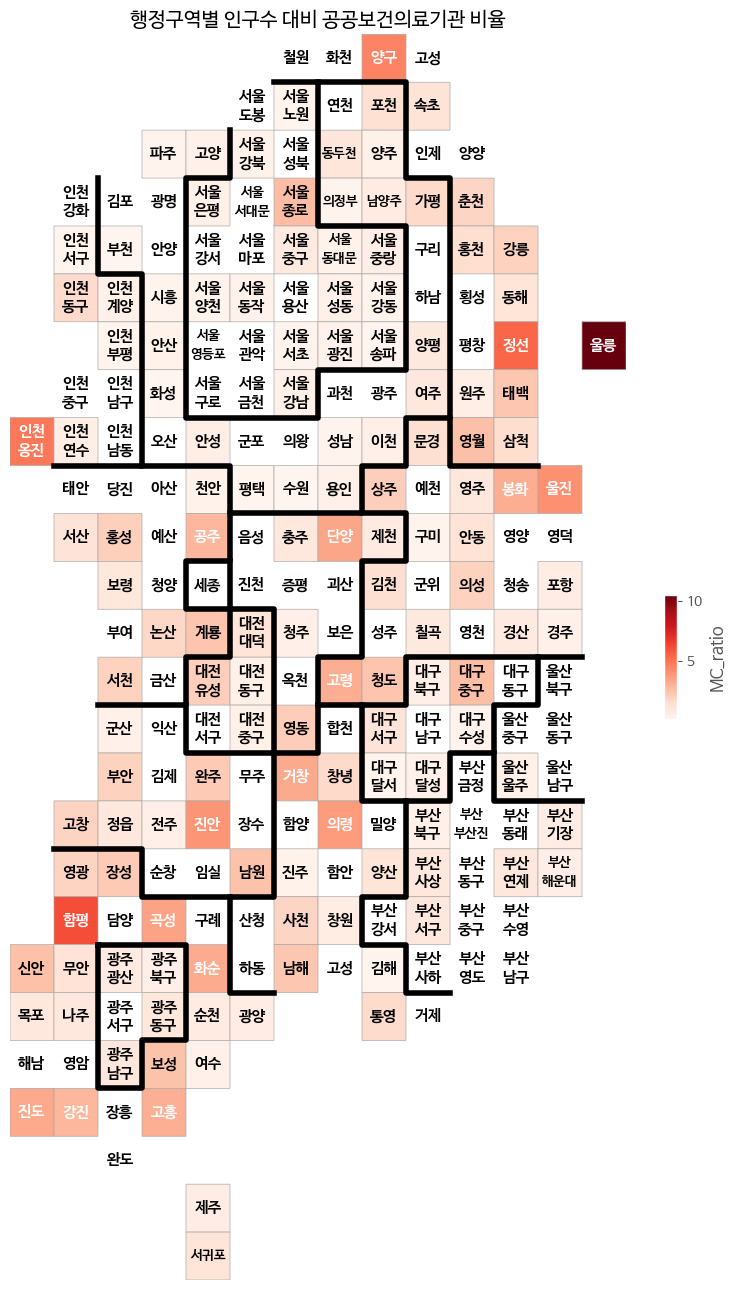

In [34]:
draw_blockMap(data_draw_korea_MC_Population_all, 'MC_ratio', '행정구역별 인구수 대비 공공보건의료기관 비율', 'Reds' )